####  Text Comparison System

In [ ]:
# Packages 

In [ ]:
# import nltk
# nltk.download()
# nltk.download('data')
# nltk.download('punkt')
# nltk.download('words')
# nltk.download('wordnet')

In [ ]:
# !pip install gingerit
# !pip install thefuzz
# !pip install fastpunct
# !pip install contractions==0.0.18
# !pip install semeval

In [ ]:
# Sample Text

In [1]:
txt_1 = 'Hi how are you? Myy name is Patricia. i love python. It is extremely useful!.'
txt_2 = 'name: patricia peters. really love python. It\'s useful and cool.'

In [2]:
sen_0 = 'Hi how are you?'
sen_1 = 'Myy name is Patricia.'
sen_2 = 'name: patricia peters.'

In [3]:
sen_3 = 'i love python'
sen_4 = 'really love python'

In [4]:
sen_5 = 'it is extremely useful'
sen_6 = 'it is useful and cool'

In [ ]:
# From the two texts, need to identify similar sentences 
# From the similar sentences, need to identify similar words 

In [ ]:
# Code 

In [5]:
# List individual sentences from text

def list_sentences(text):
    
    import nltk.data
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(text)
    
    return sentences 

In [6]:
# List individual words from sentence 

def list_words(sentence):
    
    import nltk
    words = nltk.word_tokenize(sentence)
    
    return words 

In [7]:
# Remove contractions from text 

def expand_contractions(text):
    
    import contractions
  
    expanded_words = []    
    
    for word in text.split():
        expanded_words.append(contractions.fix(word))   

    expanded_text = ' '.join(expanded_words)
    
    return expanded_text 

In [8]:
txt_2

"name: patricia peters. really love python. It's useful and cool."

In [9]:
txt_2 = expand_contractions(txt_2)
txt_2

'name: patricia peters. really love python. it is useful and cool.'

In [10]:
# Punctuation, spelling and grammar check 

def punct_check(text):

    from fastpunct import FastPunct
    fastpunct = FastPunct()
    text = fastpunct.punct([text], correct=True)   # type: list
    text = ' '.join([str(elem) for elem in text])  # convert list back to string 
    
    return text

In [11]:
txt_1

'Hi how are you? Myy name is Patricia. i love python. It is extremely useful!.'

In [12]:
punct_check(txt_1)

'Hi how are you? My name is Patricia. I love python. It is extremely useful!'

In [13]:
# Spelling and grammar check 

def spell_check(sentence):
    
    from gingerit.gingerit import GingerIt
    parser = GingerIt()
    sentence = parser.parse(sentence)
    sentence = sentence["result"]       # type: string

    return sentence

In [14]:
sen_1

'Myy name is Patricia.'

In [15]:
spell_check(sen_1)

'My name is Patricia.'

In [16]:
sen_2

'name: patricia peters.'

In [17]:
spell_check(sen_2)

'Name: Patricia peters.'

In [18]:
# Make string lower case and remove punctuation

def clean_sentence(sentence):
    
    import string
    sentence = spell_check(sentence)
    sentence = sentence.lower()
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    
    return sentence

In [19]:
sen_1 = clean_sentence(sen_1)
sen_1

'my name is patricia'

In [20]:
sen_2 = clean_sentence(sen_2)
sen_2

'name patricia peters'

In [21]:
sen_3 = clean_sentence(sen_3)
sen_4 = clean_sentence(sen_4)
sen_5 = clean_sentence(sen_5)
sen_6 = clean_sentence(sen_6)

In [22]:
# Seperate text into sentences and clean them 

def seperate_clean_text(text):
   
    text = punct_check(text)   
    text = expand_contractions(text)
    sentences = list_sentences(text)
    
    loop_length = len(sentences)
    
    for i in range(0, loop_length):
        sentences[i] = clean_sentence(sentences[i])
        
    return sentences  

In [23]:
seperate_clean_text(txt_1)

['hi how are you',
 'my name is patricia',
 'i love python',
 'it is extremely useful']

In [24]:
seperate_clean_text(txt_2)

['name patricia peters', 'really love python', 'it is useful and cool']

In [25]:
# Determines which list is larger 
# Larger list used as outer loop in remaining functions

def list_size(list1, list2):
    
    length_list_1 = len(list1)
    length_list_2 = len(list2)
    
    if length_list_2 >= length_list_1:
        large_list = list2
        large_list_length = length_list_2
        small_list = list1
        small_list_length = length_list_1
    
    else:
        large_list = list1
        large_list_length = length_list_1
        small_list = list2
        small_list_length = length_list_2
    
    return large_list, large_list_length,small_list, small_list_length

In [26]:
# Find synonyms for a word

def synonyms(word):
    
    from nltk.corpus import wordnet
    synonyms = []
    
    for synonym in wordnet.synsets(word):
        for item in synonym.lemmas():
            if word != synonym.name() and len(synonym.lemma_names()) > 1:
                synonyms.append(item.name())

    return synonyms

In [27]:
synonyms('ending')

['ending',
 'termination',
 'termination',
 'ending',
 'conclusion',
 'end',
 'ending',
 'ending',
 'conclusion',
 'finish',
 'conclusion',
 'end',
 'close',
 'closing',
 'ending',
 'end',
 'stop',
 'finish',
 'terminate',
 'cease',
 'end',
 'terminate',
 'end',
 'terminate']

In [28]:
# Remove ending of words in order to compare root word

def suffix(word):

    suff_list = ('s', '\'s', 'ing', 'ed')
    
    for suffix in suff_list:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    
    word = spell_check(word)
    
    return word   
   

In [29]:
suffix('ending')

'end'

In [30]:
suffix('cars')

'car'

In [31]:
# Determine if two words are similar or not
# If they are similar return TRUE, if not return FALSE

def compare_words(word1, word2):
    
    word1 = suffix(word1)
    word2 = suffix(word2)

    if word1 == word2:
        return True
        
    else:
        if word1 in synonyms(word2):
            return True 
        
        else:
            if word2 in synonyms(word1):
                return True
            
            else:
                return False 

In [32]:
compare_words('end', 'ending')

True

In [33]:
# Find similar words within a sentence 

def similar_words(sentence1, sentence2):
    
    similar_words = []
    
    words1 = list_words(sentence1)
    words2 = list_words(sentence2)
    
    large_list = list_size(words1, words2)[0]
    large_list_length = list_size(words1, words2)[1]
    
    small_list = list_size(words1, words2)[2]
    small_list_length = list_size(words1, words2)[3]
    
    for i in range(large_list_length):
        for j in range(0, small_list_length): 
            
            if compare_words(large_list[i], small_list[j]) == True:
                if large_list[i] not in similar_words:
                    similar_words.append(large_list[i])
                
    return similar_words 

In [34]:
sen_1

'my name is patricia'

In [35]:
sen_2

'name patricia peters'

In [36]:
similar_words(sen_1, sen_2)

['name', 'patricia']

In [37]:
# Find different words within a sentence 

def different_words(sentence1, sentence2):
    
    different_words = []
    same_words = []
    same_words = similar_words(sentence1, sentence2)
    
    words1 = list_words(sentence1)
    words2 = list_words(sentence2)
    
    large_list = list_size(words1, words2)[0]
    large_list_length = list_size(words1, words2)[1]
    
    small_list = list_size(words1, words2)[2]
    small_list_length = list_size(words1, words2)[3]
    
    if (large_list_length == small_list_length):
        
        for i in range(large_list_length):
            if compare_words(large_list[i], small_list[i]) == False:
                if large_list[i] not in same_words:
                    if large_list[i] not in different_words:
                        different_words.append(large_list[i])

                    if small_list[i] not in same_words:
                        if small_list[i] not in different_words:
                            different_words.append(small_list[i])
        
    else:
    
        for i in range(large_list_length):
            for j in range(0, small_list_length): 

                if compare_words(large_list[i], small_list[j]) == False:
                    if large_list[i] not in same_words:
                        if large_list[i] not in different_words:
                            different_words.append(large_list[i])

                    if small_list[j] not in same_words:
                        if small_list[j] not in different_words:
                            different_words.append(small_list[j])
                
    return different_words

In [38]:
sen_1

'my name is patricia'

In [39]:
sen_2

'name patricia peters'

In [40]:
different_words(sen_1, sen_2)

['my', 'peters', 'is']

In [41]:
# Convert a list to a string

def list_to_str(x):
    
    strings = [str(integer) for integer in x]
    a_string = "".join(strings)

    return a_string

In [42]:
# Convert a list to an integer

def list_to_int(x):
    
    strings = [str(integer) for integer in x]
    a_string = "".join(strings)
    an_integer = int(a_string)

    return an_integer

In [43]:
# Create a new sentence based on positioning of similar and different words
# Use similar words to create base of sentence and insert different words afterwards 

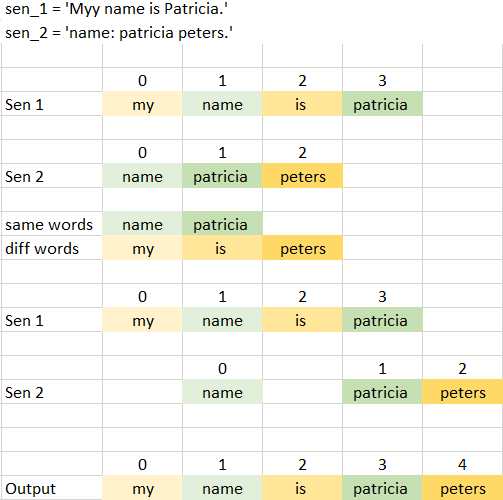

In [44]:
from IPython.display import display, Image
display(Image(filename='new_sentence.png'))

In [45]:
def new_sentence(sentence1, sentence2):
    
    same_words = []
    diff_words = []
    
    same_words = similar_words(sentence1, sentence2)
    diff_words = different_words(sentence1, sentence2)
    
    words1 = list_words(sentence1)
    words2 = list_words(sentence2)
    
    large_list = list_size(words1, words2)[0]
    large_list_length = list_size(words1, words2)[1]
    
    small_list = list_size(words1, words2)[2]
    small_list_length = list_size(words1, words2)[3]
    
    new_sentence = []

    for i in range(0, len(same_words)):

        word = same_words[i]
        word = word.split(' ')

        pos_A = [large_list.index(x) for x in word]
        pos_B = [small_list.index(x) for x in word]

        pos_A = list_to_int(pos_A)
        pos_B = list_to_int(pos_B)

        if (pos_A > pos_B) == True:
            for i in range(0, pos_A):
                if large_list[i] not in new_sentence:
                    new_sentence.append(large_list[i])
            for i in range(0, pos_B):
                if small_list[i] not in new_sentence:
                    new_sentence.append(small_list[i])

            new_sentence.append(list_to_str(word))
            
        elif (pos_A < pos_B) == True:
            for i in range(0, pos_B):
                if small_list[i] not in new_sentence:
                    new_sentence.append(small_list[i])
            for i in range(0, pos_A):
                if large_list[i] not in new_sentence:
                    new_sentence.append(large_list[i])

            new_sentence.append(list_to_str(word))
        
        else:
            for i in range(0, pos_B):
                if small_list[i] not in new_sentence:
                    new_sentence.append(small_list[i])
                    
            for i in range(0, pos_A):
                if large_list[i] not in new_sentence:
                    new_sentence.append(large_list[i])

            new_sentence.append(list_to_str(word))
            
    for i in range(0, len(diff_words)):

        word = diff_words[i]
        word = word.split(' ')

        if diff_words[i] not in new_sentence:

            if diff_words[i] in large_list: 
                pos = [large_list.index(x) for x in word]
                pos = list_to_int(pos) 

                # Word before appears 
                if large_list[pos-1] in new_sentence:
                    first_word = large_list[pos-1]
                    second_word = list_to_str(word)
                    new_sentence.insert(new_sentence.index(first_word)+1, second_word)

                # Word after appears 
                elif large_list[pos+1] in new_sentence: 
                    first_word = list_to_str(word)
                    second_word = large_list[pos+1]
                    new_sentence.insert(new_sentence.index(first_word)-1, second_word)
                    
                # If not add to end of sentence
                else:
                    new_sentence.append(diff_words[i])

            if diff_words[i] in small_list: 
                pos = [small_list.index(x) for x in word]
                pos = list_to_int(pos) 

                # Word before appears 
                if small_list[pos-1] in new_sentence:
                    first_word = small_list[pos-1]
                    second_word = list_to_str(word)
                    new_sentence.insert(new_sentence.index(first_word)+1, second_word)

                # Word after appears 
                elif words2[pos+1] in new_sentence: 
                    first_word = list_to_str(word)
                    second_word = small_list[pos+1]
                    new_sentence.insert(new_sentence.index(first_word)-1, second_word)

                # If not add to end of sentence
                else:
                    new_sentence.append(diff_words[i])

    final_sentence = ' '.join(new_sentence)
    final_sentence = punct_check(final_sentence)

    return final_sentence

In [46]:
new_sentence(sen_1, sen_2)

'My name is Patricia Peters.'

In [47]:
new_sentence(sen_3, sen_4)

'I really love Python.'

In [48]:
new_sentence(sen_5, sen_6)

'It is extremely useful and cool.'

In [49]:
def compare_sentences(sentence1, sentence2):  
    
    from thefuzz import fuzz
    from thefuzz import process
    
    if fuzz.ratio(sentence1, sentence2) > 40:
            if fuzz.partial_ratio(sentence1, sentence2) > 40:
                if fuzz.token_sort_ratio(sentence1, sentence2) > 50:
                    if fuzz.token_set_ratio(sentence1, sentence2) > 50:
                        return True
                    else:
                        return False 

In [50]:
compare_sentences(sen_1, sen_2)

C:\Users\jaime\anaconda3\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


True

In [51]:
compare_sentences(sen_3, sen_4)

True

In [52]:
compare_sentences(sen_5, sen_6)

True

In [53]:
def compare_text(text1, text2):
    
    similar_sentences = []
    different_sentences = []
    
    sentences1 = seperate_clean_text(text1)
    sentences2 = seperate_clean_text(text2)
    
    large_list = list_size(sentences1, sentences2)[0]
    large_list_length = list_size(sentences1, sentences2)[1]
    
    small_list = list_size(sentences1, sentences2)[2]
    small_list_length = list_size(sentences1, sentences2)[3]
    
    for i in range(large_list_length):
        for j in range(0, small_list_length): 
            
            if compare_sentences(large_list[i], small_list[j]) == True:
                if large_list[i] not in similar_sentences:
                    similar_sentences.append(large_list[i])
                    similar_sentences.append(small_list[j])
    
    for i in range(large_list_length):
        if large_list[i] not in similar_sentences:
            different_sentences.append(large_list[i])
    
    for j in range(0, small_list_length): 
        if small_list[j] not in similar_sentences:
            different_sentences.append(small_list[j])
             
    return different_sentences 

In [54]:
compare_text(txt_1, txt_2)

['hi how are you']

In [55]:
def combine_texts(text1, text2):
    
    new_text = []
    
    different_sentences = compare_text(txt_1, txt_2)
    
    sentences_1 = seperate_clean_text(text1)
    sentences_2 = seperate_clean_text(text2)
    
    large_list = list_size(sentences_1, sentences_2)[0]
    large_list_length = list_size(sentences_1, sentences_2)[1]
    
    small_list = list_size(sentences_1, sentences_2)[2]
    small_list_length = list_size(sentences_1, sentences_2)[3]
    
    for i in range(0, large_list_length):
        
        if large_list[i] in different_sentences:
            new_text.append(punct_check(large_list[i]))
        
        for j in range(0, small_list_length): 
            if small_list[j] in different_sentences:
                if punct_check(small_list[j]) not in new_text: 
                    new_text.append(punct_check(small_list[j]))
                    
            if (compare_sentences(large_list[i], small_list[j])==True):
                sentence = new_sentence(large_list[i], small_list[j])
                sentence = punct_check(sentence)
                new_text.append(sentence)
            
                
    final_text = ' '.join(new_text)
    final_text = punct_check(final_text)
 
    return final_text

In [56]:
txt_1

'Hi how are you? Myy name is Patricia. i love python. It is extremely useful!.'

In [57]:
txt_2

'name: patricia peters. really love python. it is useful and cool.'

In [58]:
combine_texts(txt_1, txt_2)

'Hi, how are you? My name is Patricia Peters. I really love Python. It is extremely useful and cool.'